In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datageneration = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datageneration = ImageDataGenerator(rescale=1./255)

batch_size = 100
path_dir = "C:/Users/bobby/OneDrive/Desktop/Courses/Deep_Learning/Project/Dataset"

train = train_datageneration.flow_from_directory(path_dir+'/train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid = valid_datageneration.flow_from_directory(path_dir+'/valid',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

train_sample_size = train.samples
valid_sample_size = valid.samples

Found 66926 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D as Convolution2D
from tensorflow.keras.layers import MaxPooling2D as Pooling
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

model = Sequential()

#convolution layer 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling layer 1
model.add(Pooling(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())

# Convolution layer 2
model.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling layer 2
model.add(Pooling(pool_size = (2, 2), strides = (2, 2), padding='valid'))
model.add(BatchNormalization())

# Convolution layer 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())

# Convolution layer 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())

# Convolution layer 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling layer 3
model.add(Pooling(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())

# Flattening layer
model.add(Flatten())

# Full Connection
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units = 38, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [3]:
model.load_weights('best_weights_1.hdf5')

In [4]:
from keras import layers
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten
14 dense
15 dropout
16 batch_normalization_5
17 dense_1
18 dropout_1
19 batch_normalization_6
20 dense_2
21 dropout_2
22 batch_normalization_7
23 dense_3


Using TensorFlow backend.


In [5]:
print("Freezed layers:")
for i, layer in enumerate(model.layers[:20]):
    print(i, layer.name)
    layer.trainable = False

Freezed layers:
0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten
14 dense
15 dropout
16 batch_normalization_5
17 dense_1
18 dropout_1
19 batch_normalization_6


In [6]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.SGD(lr=0.01,momentum=0.9,decay=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

weights = "best_weights_SGD-0.1.hdf5"
save_model="Model.hdf5"
CheckPoint = ModelCheckpoint(weights, monitor='val_accuracy', verbose=1, save_best_only=True,save_weights_only=True, mode='max')
callback_list = [CheckPoint]


history = model.fit(train,
                         steps_per_epoch=train_sample_size//batch_size,
                         validation_data=valid,
                         epochs=1,
                         validation_steps=valid_sample_size//batch_size,
                         callbacks=callback_list)

model.save(save_model)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 669 steps, validate for 175 steps
668/669 [============================>.] - ETA: 1s - loss: 1.0358 - accuracy: 0.6997
Epoch 00001: val_accuracy improved from -inf to 0.72457, saving model to best_weights_SGD-0.1.hdf5
669/669 [==============================] - 986s 1s/step - loss: 1.0356 - accuracy: 0.6997 - val_loss: 1.5199 - val_accuracy: 0.7246


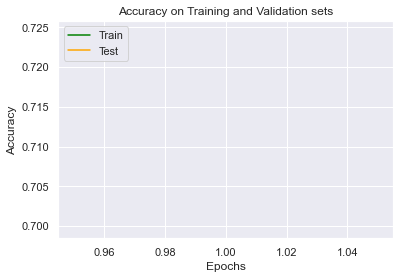

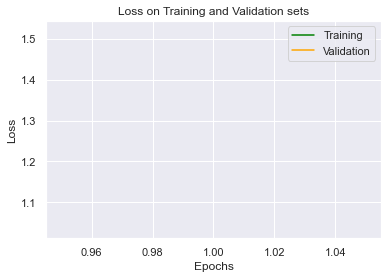

In [8]:
import seaborn as sb 
import matplotlib.pyplot as plt
sb.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, color='green', label='Training')
plt.plot(epochs, val_acc, color='orange', label='Validation')
plt.title('Accuracy on Training and Validation sets')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.figure()
plt.plot(epochs, loss, color='green', label='Training')
plt.plot(epochs, val_loss, color='orange', label='Validation')
plt.title('Loss on Training and Validation sets')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:


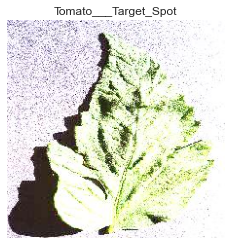

In [12]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image as bob

image_path = "C:/Users/bobby/OneDrive/Desktop/Courses/Deep_Learning/Project/Dataset/Test/TomatoHealthy4.JPG"
test_image = image.load_img(image_path, target_size=(224, 224))
#test_image = test_image.rotate(180)
test_image = test_image.transpose(bob.FLIP_LEFT_RIGHT)
ip_img = image.img_to_array(test_image)
ip_img = np.expand_dims(ip_img, axis=0)
ip_img = ip_img/255


class_dict = train.class_indices
listt = list(class_dict.keys())

print("Following is our prediction:")
prediction = model.predict(ip_img)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = listt[index]


plt.figure(figsize = (4,4))
plt.imshow(test_image)
plt.axis('off')
plt.title(class_name)
plt.show()

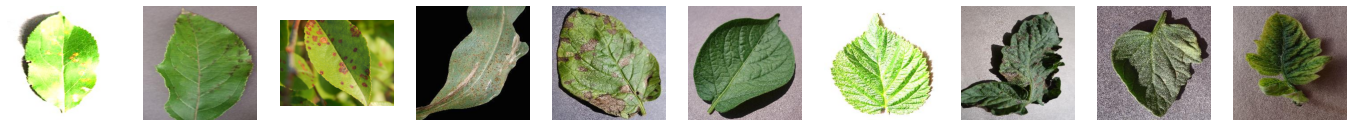

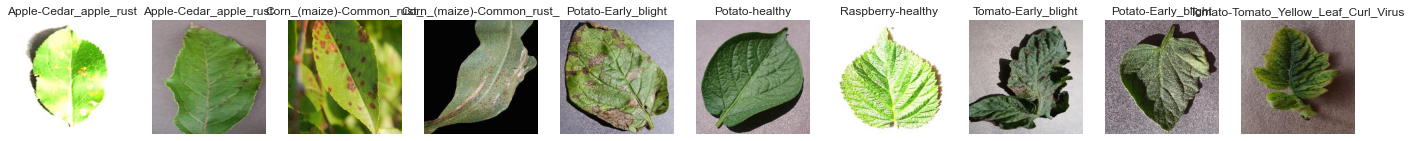

In [17]:
from os.path import join, isfile
from os import listdir
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image as bob

predicted_images=[]
imageObjects = []
imagePath = "C:/Users/bobby/OneDrive/Desktop/Courses/Deep_Learning/Project/Dataset/testing"
Images  = [
    join( imagePath, fn )                    
    for fn in listdir( imagePath )           
    if isfile( join( imagePath, fn ) )      
    and fn.lower().endswith(('.png','.jpg'))]

class_dict = train.class_indices
listt = list(class_dict.keys())

def show(list_of_files):
    fig = plt.figure(figsize=(24,24))
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        image = imread(list_of_files[i])
        plt.imshow(image,cmap='Greys_r')
        plt.axis('off')
 
def predict(imgFiles):
     fig = plt.figure(figsize=(24,24))
     number_of_files = len(imgFiles)
     for i in range(number_of_files):
         img=bob.open(imgFiles[i])
         b=224
         img=img.resize((b,b),bob.ANTIALIAS)
         im = image.img_to_array(img)
         im = np.expand_dims(img, axis=0)
         im = im/255
         prediction = model.predict(im)
         d = prediction.flatten()
         j = d.max()
         for index,item in enumerate(d):
             if item == j:
                 class_name = listt[index]
         a=fig.add_subplot(1,number_of_files,i+1)
         plt.imshow(img)
         class_name=class_name.replace("___", "-")
         plt.title(class_name)
         plt.axis('off')
       
show(Images)
predict(Images)

,Sample name,Predicted class
0,AppleCedarRust1,Apple-Cedar_apple_rust
1,AppleCedarRust2,Apple-Cedar_apple_rust
2,AppleCedarRust3,Apple-Cedar_apple_rust
3,AppleCedarRust4,Apple-Cedar_apple_rust
4,AppleScab1,Apple-Cedar_apple_rust
5,AppleScab2,Tomato-Leaf_Mold
6,AppleScab3,Corn_(maize)-Cercospora_leaf_spot Gray_leaf_spot
7,CornCommonRust1,Corn_(maize)-Common_rust_
8,CornCommonRust2,Corn_(maize)-Common_rust_
9,CornCommonRust3,Corn_(maize)-Common_rust_


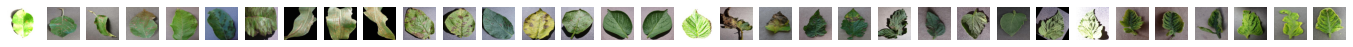

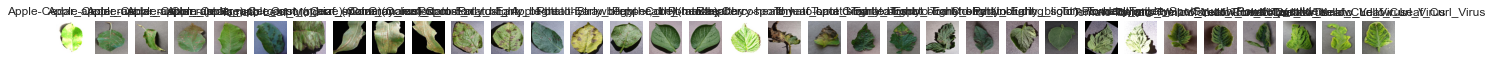

In [18]:
import os
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image as bob
import pandas as pd

predicted_images=[]
images = []
testlist=os.listdir("C:/Users/bobby/OneDrive/Desktop/Courses/Deep_Learning/Project/Dataset/Test")
sourcepath="C:/Users/bobby/OneDrive/Desktop/Courses/Deep_Learning/Project/Dataset/Test"
imgFiles = [os.path.join(sourcepath, f) for f in testlist]

class_dict = train.class_indices
listt = list(class_dict.keys())

def show(total_files):
    fig = plt.figure(figsize=(24,24))
    n = len(total_files)
    for i in range(n):
        a=fig.add_subplot(1,n,i+1)
        image = imread(total_files[i])
        plt.imshow(image,cmap='Greys_r')
        plt.axis('off')
 

def predict(imgFiles,result):
    fig = plt.figure(figsize=(24,24))
    n = len(imgFiles)
    for i in range(n):
        img=bob.open(imgFiles[i])
        b=224
        img=img.resize((b,b),bob.ANTIALIAS)
        im = image.img_to_array(img)
        im = np.expand_dims(img, axis=0)
        im = im/255
        prediction = model.predict(im)
        d = prediction.flatten()
        j = d.max()
        for index,item in enumerate(d):
            if item == j:
                class_name = listt[index]

        a=fig.add_subplot(1,n,i+1)
        plt.imshow(img)
        class_name=class_name.replace("___", "-")
        plt.title(class_name)
        plt.axis('off')
        
        filename=testlist[i].replace(".JPG", "")
        
        result=result.append({"Sample name":filename,
                                  "Predicted class":class_name},ignore_index=True)

        result.to_csv("result.csv",index=False)            
    return result
        
show(imgFiles)
result = pd.DataFrame(columns=['Sample name', 'Predicted class'])
result=predict(imgFiles,result)
result.head(33)